## Name: Ravi Sista
### Task 2: Prediction using Unsupervised ML
In this task, we've to perform Unsupervised Learning on the **Iris Data set**.
We also have to predict the optimum number of clusters and represent it visually.
For performing the Supervised Learning, I am going to use **K-Means** Clustering Algorithm.

### Step 1: Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [2]:
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2: Data Pre-processing

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since there are no missing or duplicate values, we will proceed towards Analysis & Visualization of the data.

### Step 3: Data Analysis & Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Text(0.5, 1.0, 'No. of Species')

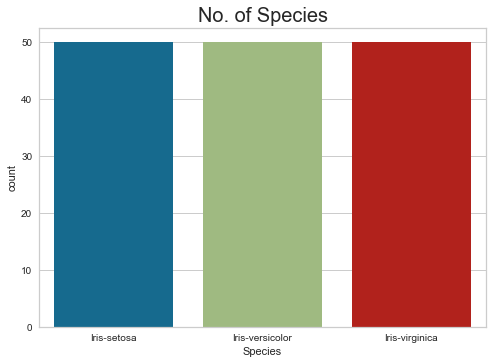

In [7]:
sns.countplot(x = 'Species', data = df)
plt.title('No. of Species', fontsize = 20)

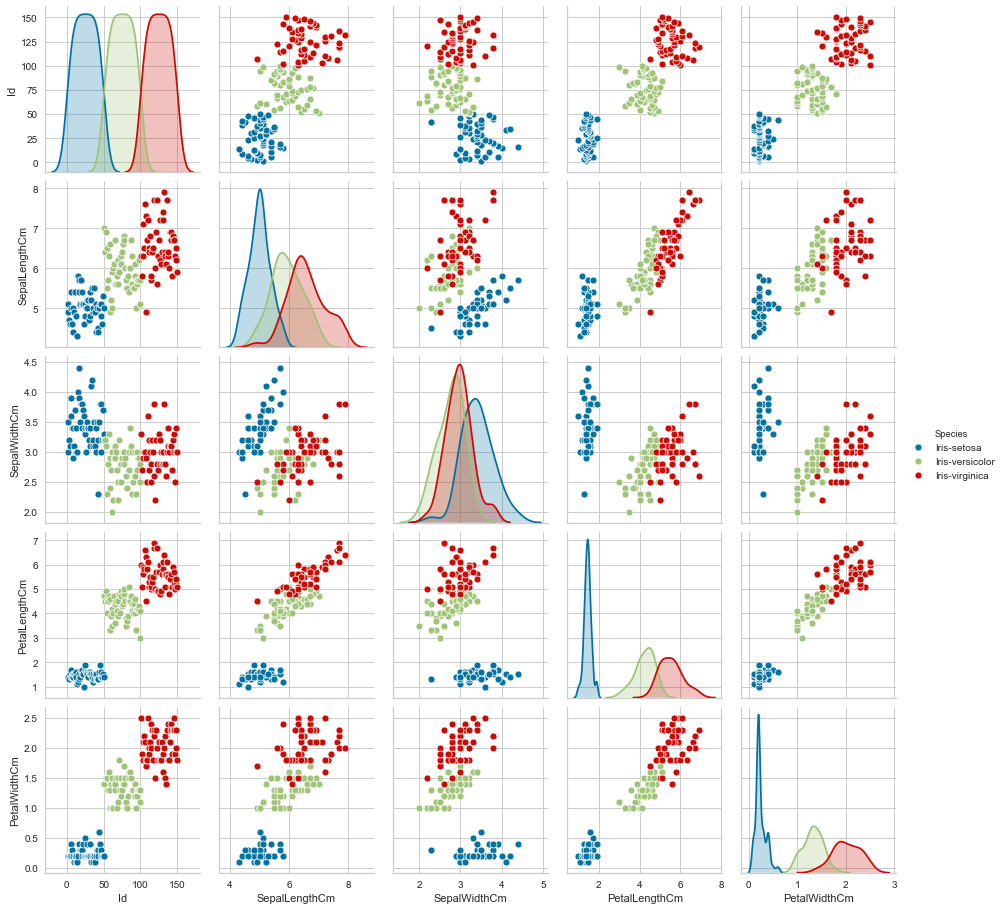

In [8]:
sns.pairplot(data = df, hue = 'Species')

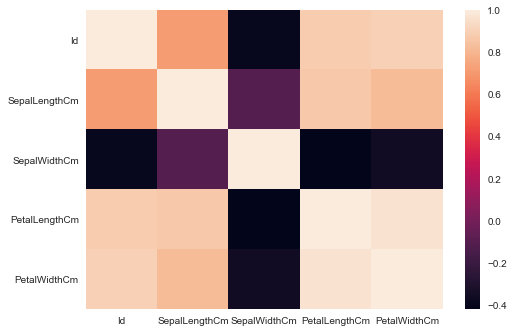

In [9]:
sns.heatmap(df.corr())

{'whiskers': [<matplotlib.lines.Line2D at 0x156d5a8e388>,
 'caps': [<matplotlib.lines.Line2D at 0x156d5a8ec48>,
 'boxes': [<matplotlib.lines.Line2D at 0x156d5789c08>,
 'medians': [<matplotlib.lines.Line2D at 0x156d5a91bc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x156d5a96a48>,
 'means': []}

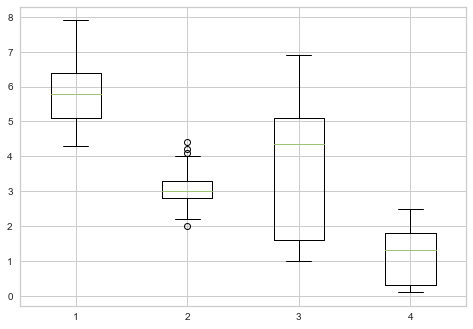

In [10]:
ax1 = df['SepalLengthCm']
ax2 = df['SepalWidthCm']
ax3 = df['PetalLengthCm']
ax4 = df['PetalWidthCm']

plt.boxplot([ax1, ax2, ax3, ax4])

### Step 4:

## 1) Clustering by using factors such as Sepal Length & Sepal Width 

### Optimum k value calculation for the first cluster

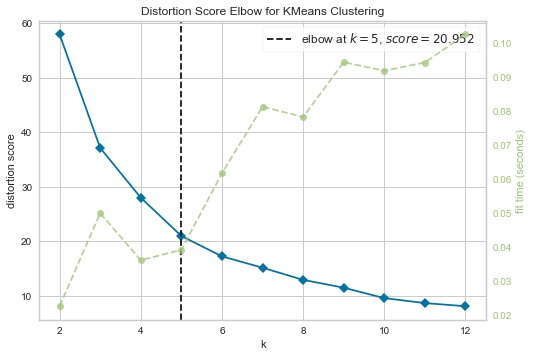

In [44]:
df1 = df[['SepalLengthCm', 'SepalWidthCm']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df1)
algorithm.show()


**Optimum value of k = 5**
### Training the first cluster model

In [45]:
algorithm = KMeans(n_clusters = 5, init='k-means++', algorithm='elkan')
algorithm.fit(df1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df1)

y_km

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 4, 1, 1, 4, 0, 4, 1, 4,
       1, 1, 1, 2, 2, 1, 1, 4, 4, 2, 1, 2, 4, 2, 1, 4, 2, 2, 1, 4, 4, 4,
       1, 1, 2, 4, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

### Visualizing the Predicted labels of the first cluster model

Text(0.5, 1.0, 'Segmentation using Sepal Length and Sepal Width')

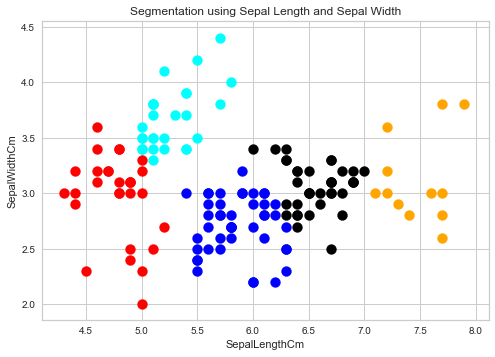

In [46]:
plt.scatter(df1[y_km ==0,0], df1[y_km == 0,1], s=100, c='red')
plt.scatter(df1[y_km ==1,0], df1[y_km == 1,1], s=100, c='black')
plt.scatter(df1[y_km ==2,0], df1[y_km == 2,1], s=100, c='blue')
plt.scatter(df1[y_km ==3,0], df1[y_km == 3,1], s=100, c='cyan')
plt.scatter(df1[y_km ==4,0], df1[y_km == 4,1], s=100, c='orange')

plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Segmentation using Sepal Length and Sepal Width')

### Evaluating the first cluster model

In [47]:
# Evaluating the accuracy of the Clustering model 1 
from sklearn import metrics
metrics.adjusted_rand_score(labels, y_km)

0.9584574073648976

#### Accuracy of the first cluster model is **95.84%**

## 2) Clustering by using factors such as Petal Length & Petal Width 

### Optimum k value calculation for the second cluster

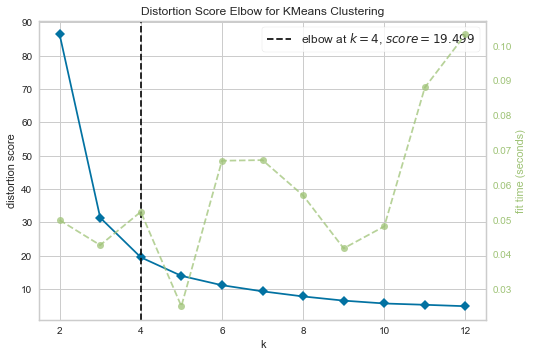

In [15]:
df2 = df[['PetalLengthCm', 'PetalWidthCm']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df2)
algorithm.show()

**Optimum value of k = 4**
### Training the second cluster model

In [16]:
algorithm = KMeans(n_clusters = 4, init = 'k-means++', algorithm = 'elkan')
algorithm.fit(df2)
labels2 = algorithm.labels_
centroids = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df2)

y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0])

### Visualizing the Predicted labels of the second cluster model

Text(0.5, 1.0, 'Segmentation using Petal Length and Petal Width')

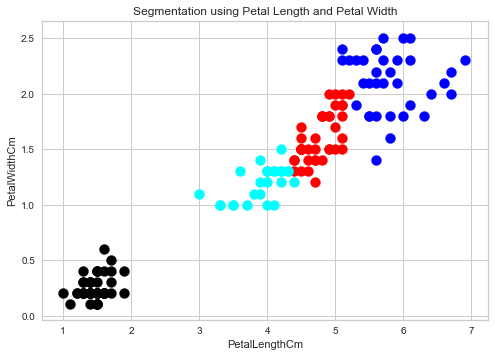

In [17]:
plt.scatter(df2[y_km ==0,0], df2[y_km == 0,1], s=100, c='red')
plt.scatter(df2[y_km ==1,0], df2[y_km == 1,1], s=100, c='black')
plt.scatter(df2[y_km ==2,0], df2[y_km == 2,1], s=100, c='blue')
plt.scatter(df2[y_km ==3,0], df2[y_km == 3,1], s=100, c='cyan')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Segmentation using Petal Length and Petal Width')



### Evaluating the second cluster model

In [18]:
import sklearn.metrics
metrics.adjusted_rand_score(labels2, y_km)

0.9850311658160049

#### The accuracy of the second cluster model is 98. 50%

## 3) Clustering by using factors such as Petal Length & Sepal Length 

### Optimum k value calculation for the third cluster

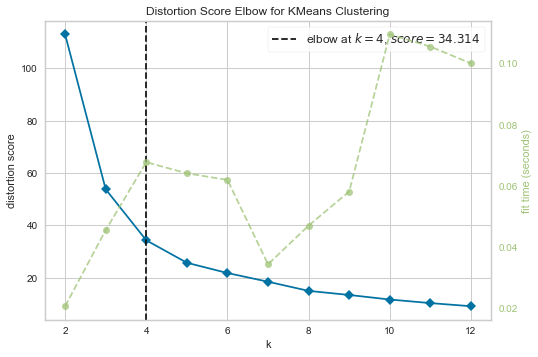

In [21]:
df3 = df[['PetalLengthCm', 'SepalLengthCm']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df3)
algorithm.show()

**Optimum value of k = 4**
### Training the third cluster model 

In [22]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df3)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df3)

y_km

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 1, 3, 1, 1, 0, 1, 1, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3])

### Visualizing the Predicted labels of the third cluster model

Text(0.5, 1.0, 'Segmentation using Petal Length and Sepal Length')

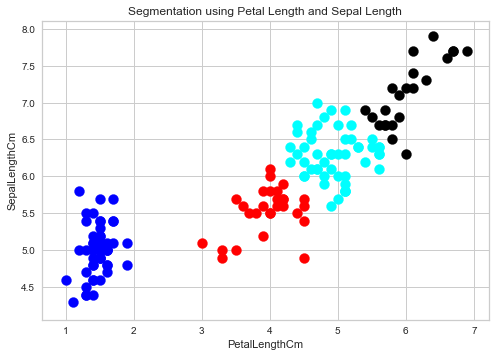

In [23]:
plt.scatter(df3[y_km ==0,0], df3[y_km == 0,1], s=100, c='red')
plt.scatter(df3[y_km ==1,0], df3[y_km == 1,1], s=100, c='black')
plt.scatter(df3[y_km ==2,0], df3[y_km == 2,1], s=100, c='blue')
plt.scatter(df3[y_km ==3,0], df3[y_km == 3,1], s=100, c='cyan')
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.title('Segmentation using Petal Length and Sepal Length')

### Evaluating the third cluster model

In [24]:
from sklearn import metrics

In [25]:
metrics.adjusted_rand_score(labels1, y_km)

1.0

#### The accuracy of the second cluster model is 100% 


## 4) Clustering by using factors such as Petal Length & Sepal Width 

### Optimum k value calculation for the fourth cluster

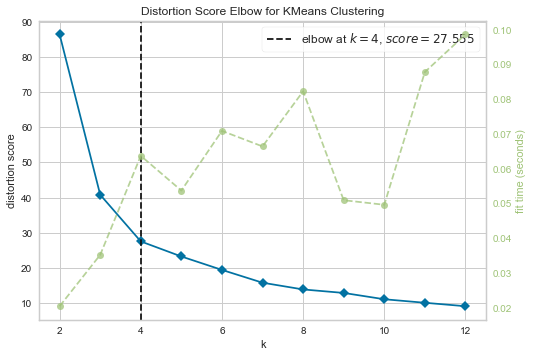

In [26]:
df4 = df[['PetalLengthCm', 'SepalWidthCm']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df4)
algorithm.show()

**Optimum value of k = 4**
### Training the fourth cluster model

In [27]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', algorithm='elkan') )
algorithm.fit(df4)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df4)

y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3])

### Visualizing the Predicted labels of the fourth cluster model

Text(0.5, 1.0, 'Segmentation using Petal Length and Sepal Width')

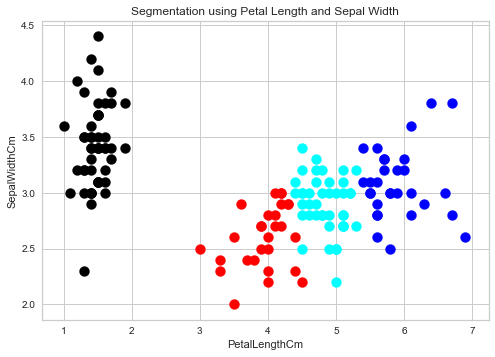

In [28]:
plt.scatter(df4[y_km ==0,0], df4[y_km == 0,1], s=100, c='red')
plt.scatter(df4[y_km ==1,0], df4[y_km == 1,1], s=100, c='black')
plt.scatter(df4[y_km ==2,0], df4[y_km == 2,1], s=100, c='blue')
plt.scatter(df4[y_km ==3,0], df4[y_km == 3,1], s=100, c='cyan')
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Segmentation using Petal Length and Sepal Width')

### Evaluating the second cluster model

In [29]:
from sklearn import metrics
metrics.adjusted_rand_score(labels1, y_km)

1.0

#### The accuracy of the second cluster model is 100%


## 5) Clustering by using factors such as Petal Width & Sepal Length 

### Optimum k value calculation for the fifth cluster

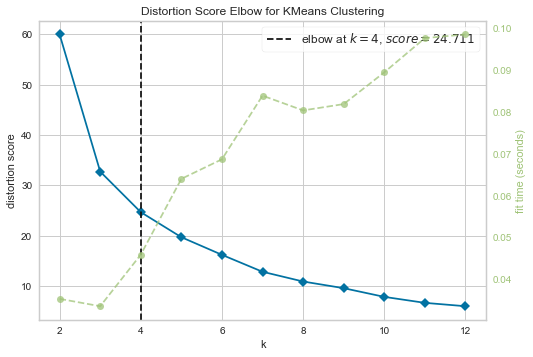

In [32]:
df5 = df[['PetalWidthCm', 'SepalLengthCm']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df5)
algorithm.show()

**Optimum value of k = 4**
### Training the fifth cluster model

In [33]:
algorithm = KMeans(n_clusters = 4 ,init='k-means++', algorithm='elkan')
algorithm.fit(df5)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df5)

y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 3, 1, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 1, 3, 3, 1, 2, 1, 3, 1,
       3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3])

### Visualizing the Predicted labels of the fifth cluster model

Text(0.5, 1.0, 'Segmentation using Petal Width and Sepal Length')

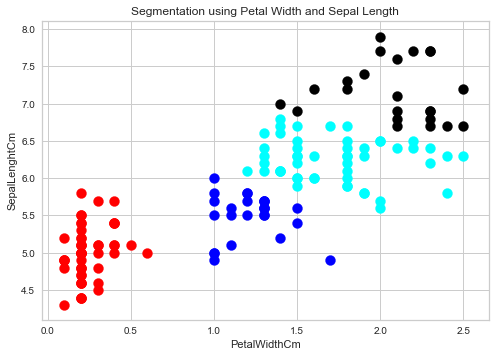

In [34]:
plt.scatter(df5[y_km ==0,0], df5[y_km == 0,1], s=100, c='red')
plt.scatter(df5[y_km ==1,0], df5[y_km == 1,1], s=100, c='black')
plt.scatter(df5[y_km ==2,0], df5[y_km == 2,1], s=100, c='blue')
plt.scatter(df5[y_km ==3,0], df5[y_km == 3,1], s=100, c='cyan')
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalLenghtCm')
plt.title('Segmentation using Petal Width and Sepal Length')

### Evaluating the fifth cluster model

In [35]:
metrics.adjusted_rand_score(labels1, y_km)

1.0

#### The accuracy of the second cluster model is 100%


## 6) Clustering by using factors such as Petal Width & Sepal Width 

### Optimum k value calculation for the sixth cluster

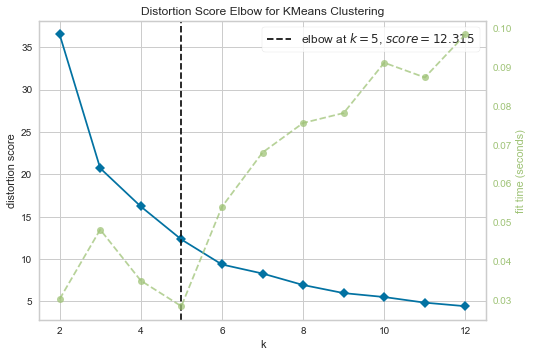

In [36]:
df6 = df[['PetalWidthCm', 'SepalWidthCm']].values
algorithm = KElbowVisualizer(KMeans(init='k-means++',algorithm='elkan'), k=12, metric="distortion")
algorithm.fit(df6)
algorithm.show()

### Training the sixth cluster model

In [37]:
algorithm = KMeans(n_clusters = 4 ,init='k-means++', algorithm='elkan')
algorithm.fit(df6)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
y_km = algorithm.fit_predict(df6)

y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1,
       1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 3, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### Visualizing the Predicted labels of the sixth cluster model

Text(0.5, 1.0, 'Segmentation using Petal Width and Sepal Width')

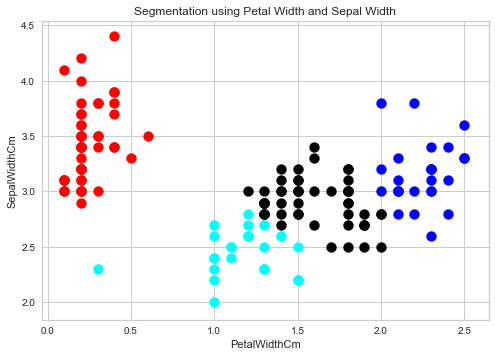

In [38]:
plt.scatter(df6[y_km ==0,0], df6[y_km == 0,1], s=100, c='red')
plt.scatter(df6[y_km ==1,0], df6[y_km == 1,1], s=100, c='black')
plt.scatter(df6[y_km ==2,0], df6[y_km == 2,1], s=100, c='blue')
plt.scatter(df6[y_km ==3,0], df6[y_km == 3,1], s=100, c='cyan')
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalWidthCm')
plt.title('Segmentation using Petal Width and Sepal Width')

### Evaluating the sixth cluster model

In [39]:
metrics.adjusted_rand_score(labels1, y_km)

0.9657709259623476

#### The accuracy of the sixth cluster model is 96. 57%